In [1]:
import numpy as np

## Multi-Dimensional Arrays

In [2]:
a = np.array([[ 0, 1, 2, 3],
              [10,11,12,13]])
a

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13]])

In [3]:
# Shape (Rows, Columns)
a.shape

(2, 4)

In [4]:
# Element Count

a.size

8

In [5]:
# Number of dimensions

a.ndim

2

In [6]:
# Get/Set elements

print('get element at row 1, column 3:', a[1,3])

a[1,3] = -1

print('modified element at same pos')
a

get element at row 1, column 3: 13
modified element at same pos


array([[ 0,  1,  2,  3],
       [10, 11, 12, -1]])

In [7]:
# Address second (ONEth) row using single index

# STANDARD (non-fancy) indexing -- it's a view (reference), not a copy

a[1]

array([10, 11, 12, -1])

## Array Slicing

Slices are **references**

In [8]:
# super hacky 6x6 numpy matrix

b = list(range(6))

list_matrix = [b]*6
list_matrix_mod = [list_matrix[0]]

for i, row in enumerate(list_matrix[1:]):
    str_list = [str(x) for x in row]
    list_matrix_mod.append([int(str(i+1)+x) for x in str_list])

b = np.array(list_matrix_mod)
b

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [9]:
# Slicing works much like standard Python slicing

b[0, 3:5] # first row, 4th through 5th column

array([3, 4])

In [10]:
b[4:, 4:] # 5th+ rows, 5th+ columns

array([[44, 45],
       [54, 55]])

In [11]:
b[:, 2] # all rows, third column

array([ 2, 12, 22, 32, 42, 52])

In [12]:
# Strides are also possible

b[2::2, ::2] # third row through last row, every other element; every column, every row, every other element

# this is the same as writing b[2:5:2, 0:5:2]

array([[20, 22, 24],
       [40, 42, 44]])

In [13]:
## Remember that these are references (views), not copies. So changes on slices will affect original data.

line_end = '\n'*3

a = np.arange(20)
print('a')
print(a, end=line_end)

a = np.reshape(a, (5,4))
print('a, reshaped')
print(a, end=line_end)

b = a[2, :]
print('b -- a slice of a (second row only)')
print(b, end=line_end)

b[0] = -999
print('modifying a slice...')
print(b, end=line_end)

print('...modifies the original array')
print(a, end=line_end)

bb = b.copy()
print('bb -- a deep copy of b')
print(bb, end=line_end)

bb[1] = -888
print('modifying a copy only modifies that copy')
print('bb:')
print(bb, end=line_end)
print('b:')
print(b, end=line_end)
print('a:')
print(a, end=line_end)

a
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


a, reshaped
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


b -- a slice of a (second row only)
[ 8  9 10 11]


modifying a slice...
[-999    9   10   11]


...modifies the original array
[[   0    1    2    3]
 [   4    5    6    7]
 [-999    9   10   11]
 [  12   13   14   15]
 [  16   17   18   19]]


bb -- a deep copy of b
[-999    9   10   11]


modifying a copy only modifies that copy
bb:
[-999 -888   10   11]


b:
[-999    9   10   11]


a:
[[   0    1    2    3]
 [   4    5    6    7]
 [-999    9   10   11]
 [  12   13   14   15]
 [  16   17   18   19]]




--------

## Fancy indexing

Fancy indexing gives you **copies**, ***not references***

In [14]:
# indexing by position

a = np.arange(0, 80, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70])

In [15]:
# fancy indexing

indices = [1, 2, -3]
y = a[indices]
y

array([10, 20, 50])

### Masking

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
a = np.linspace(0, 2*np.pi, 21)
a

array([ 0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339,
        3.14159265,  3.45575192,  3.76991118,  4.08407045,  4.39822972,
        4.71238898,  5.02654825,  5.34070751,  5.65486678,  5.96902604,
        6.28318531])

In [18]:
%precision 3

'%.3f'

In [19]:
a

array([ 0.   ,  0.314,  0.628,  0.942,  1.257,  1.571,  1.885,  2.199,
        2.513,  2.827,  3.142,  3.456,  3.77 ,  4.084,  4.398,  4.712,
        5.027,  5.341,  5.655,  5.969,  6.283])

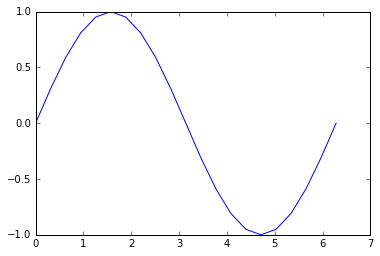

In [20]:
b = np.sin(a)

plt.plot(a, b)
plt.show()

what if someone asked, *what are the values of b >= 0?*

In [21]:
mask = b >=0

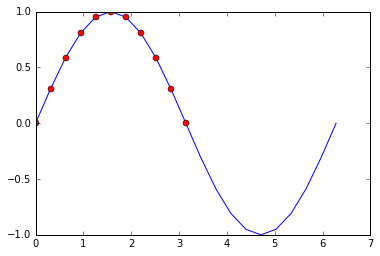

In [22]:
plt.plot(a, b)
plt.plot(a[mask], b[mask], 'ro')
plt.show()

In [23]:
mask2 = (b >= 0) & (a <= np.pi/4) ## parentheses are required due to order of operations
mask2

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

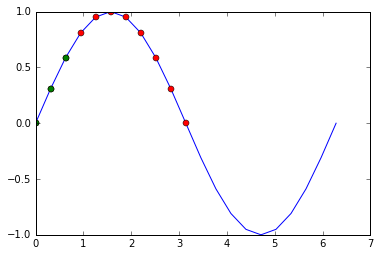

In [24]:
plt.plot(a, b)
plt.plot(a[mask], b[mask], 'ro')
plt.plot(a[mask2], b[mask2], 'go')
plt.show()

### Fancy indexing in 2D

In [25]:
# hacky 6x6 matrix again

b = list(range(6))

list_matrix = [b]*6
list_matrix_mod = [list_matrix[0]]

for i, row in enumerate(list_matrix[1:]):
    str_list = [str(x) for x in row]
    list_matrix_mod.append([int(str(i+1)+x) for x in str_list])

b = np.array(list_matrix_mod)
b

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [26]:
# offset diagonal

b[(0, 1, 2, 3, 4), 
  (1, 2, 3, 4, 5)]

array([ 1, 12, 23, 34, 45])

In [27]:
# another diagonal method
# (drawback - this is a "retriever" - reads but can't write values)

print(b.diagonal())

print(b.diagonal(1))

[ 0 11 22 33 44 55]
[ 1 12 23 34 45]


In [28]:
# row 4+
# columns 1, 3, 6

b[3:, [0, 2, 5]]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

In [29]:
mask = np.array([1,0,1,0,0,1], dtype=bool)
b[mask, 2] # boolean mask applied to column #3

array([ 2, 22, 52])

### "Incomplete" indexing

In [30]:
b[:-1]

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45]])

In [31]:
y = b[:-1][:3]
y

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25]])

In [32]:
# condition = np.array([[0],[1],[1],[0],[1]], dtype=bool)
condition = np.array([0,1,1,0,1], dtype=bool)
y = b[:-1][condition]
y

array([[10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [40, 41, 42, 43, 44, 45]])

## Where

** Dimension ** - find the indices in array where expression is True

In [33]:
# create a mask
a = np.array([0,12,5,20])
a > 10

array([False,  True, False,  True], dtype=bool)

In [34]:
# Note: it returns a tuple!
np.where(a > 10)

(array([1, 3]),)

**np.where** in ***n*** dimensions

In [35]:
# np.where in n Dimensions

# in general, the tuple returned is the 
# index of the element satisfying the 
# condition in each dimension

a = np.array([[0, 12, 5, 20],
              [1, 2, 11, 15]
             ])
print(a)
loc = np.where(a > 10)
loc

[[ 0 12  5 20]
 [ 1  2 11 15]]


(array([0, 0, 1, 1]), array([1, 3, 2, 3]))

In [36]:
a = np.array([[0, 12, 5, 20],
              [1, 2, 11, 15],
              [5, 6, 27, 13]
              ])

print(a)

np.where(a > 10)

[[ 0 12  5 20]
 [ 1  2 11 15]
 [ 5  6 27 13]]


(array([0, 0, 1, 1, 2, 2]), array([1, 3, 2, 3, 2, 3]))